<img src="images/power_turbines.jpeg" width = 1000px>

# Machine Learning and Statistics - Project 2020
#### Karolina Szafran-Belzowska, G00376368
***

## Instructions

Create a web service that uses machine learning to make predictions based on the data set **powerproduction**. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

## Libraries

In [15]:
# import required packages

import pandas as pd # reads in the csv and displays in a pandas dataframe
import numpy as np # # numerical arrays
import seaborn as sns # plots
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler # normalizes the data

## Part 1:  Explore the data

In [16]:
# import csv file
df = pd.read_csv('powerproduction.csv')
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [17]:
# describe the data
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [18]:
# 
# https://datascienceplus.com/machine-learning-with-python-scikit-learn-part-1/, 02/01/2021
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(500, 2)

From the information above I can see as follows:

- dataset contains variables such as wind speed and wind turbine power,
- dataset has 500 rows and 2 columns,
- data type: floats,
- the speed range is 0 (min) - 25 (max),
- the power range is 0 (min) - 113.56 (max),
- We do not know what kind of measurement units the variables are, so according to common measurement units, I assume that power units are given in kilowatts/hours (kW/h) and the speed units are metres/seconds (m/s).

### Plot the data

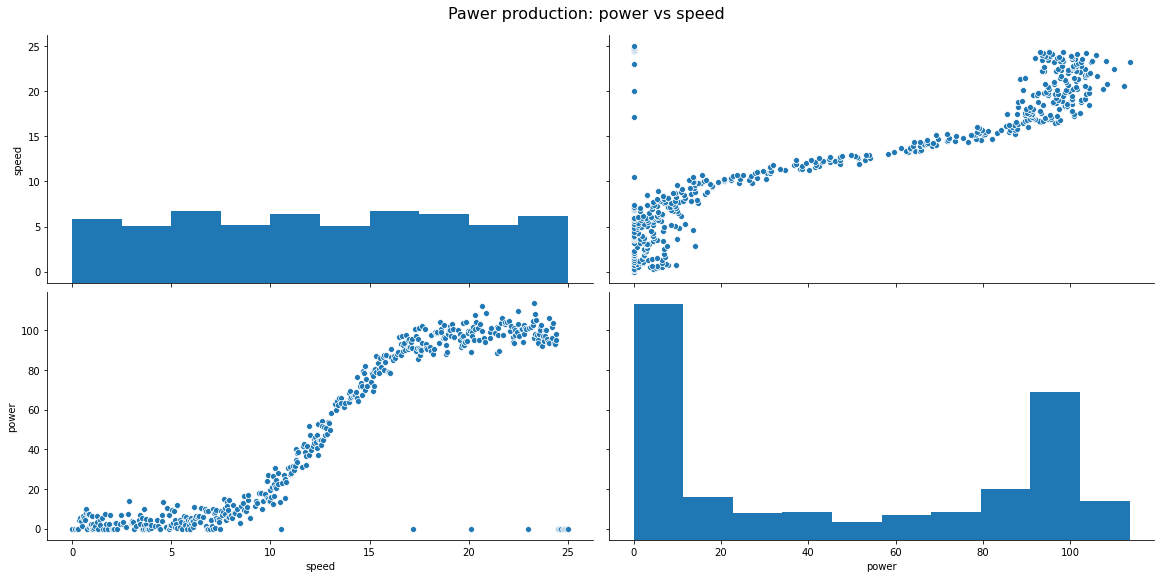

In [19]:
# sns.pairplot(df)
sns.pairplot(df, height=4, aspect=2, diag_kind="hist");
plt.suptitle("Pawer production: power vs speed", fontsize = 16) # Title
plt.subplots_adjust(top=0.93)
# Taken from: https://seaborn.pydata.org/generated/seaborn.pairplot.html, 02/01/2021

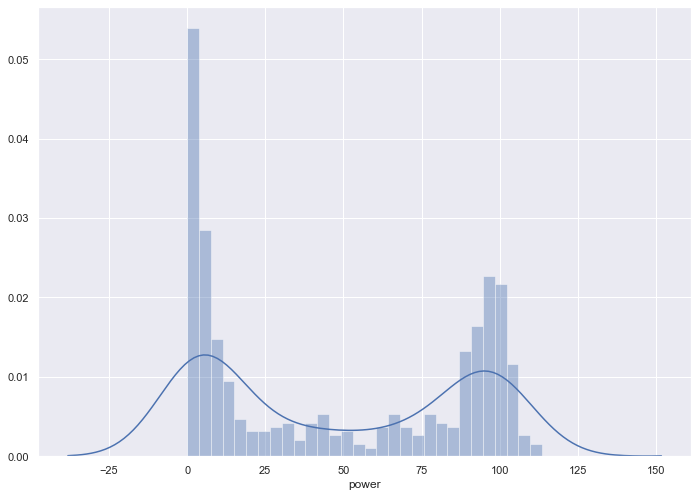

In [20]:
# plot histogram on 'power' and 'speed' (median value) using seaborn
# https://towardsdatascience.com/a-comprehensive-intro-to-data-visualization-with-seaborn-distribution-plots-888ff3436f36, 02/01/2021
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['power'], bins=30)

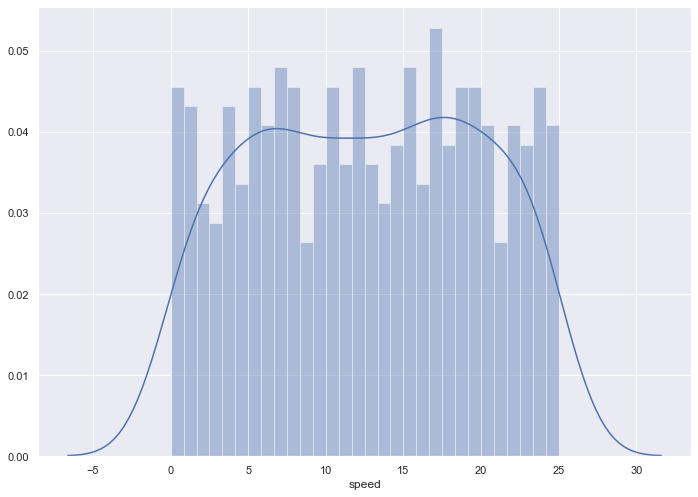

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['speed'], bins=30)

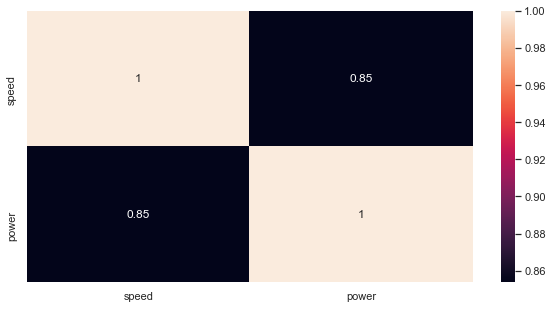

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))

sns.heatmap(data=correlation_matrix, annot=True)

### Linear Regression (the whole data)

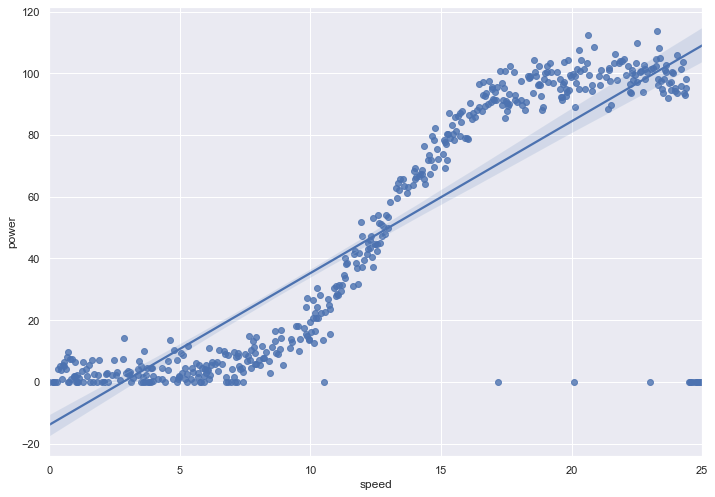

In [23]:
sns.regplot(x='speed',y='power',data = df) # Linear regression of the whole data
plt.show()

## Part 2: Clean the data

To continue I will get rid of 0.0 kW power data points. 

In [24]:
# Taken from: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html, 02/01/2021
# and https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741, 02/01/2021
df2 = df.loc[(df['power'] == 0.0)] # data for which the power is equal to 0.0 KW
df2
# 49 zero values in the power column. 

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


### Cleaned dataset

In [25]:
df3 = df.loc[(df['power'] != 0.0)] # data for which the power is greater than 0.0 KW
df3
# the cleaned data contains 451 rows(values).

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [26]:
# I will check if there are any 0.0 values in 'speed' data points
df4 = df.loc[(df['speed'] == 0.0)] # data for which the power is equal to 0.0 m/s
df4
# output gives me 0, so it means there is no data which is equal to 0.0 in this case.

,speed,power
0,0.0,0.0


In [27]:
# describe the cleaned data 
# taken from: https://www.w3resource.com/pandas/dataframe/dataframe-describe.php, 02/01/2021
df3.describe().round(2)

,speed,power
count,451.00,451.00
mean,13.00,53.23
std,6.84,40.52
min,0.32,0.07
25%,7.34,8.54
50%,13.04,58.17
75%,18.78,94.73
max,24.40,113.56


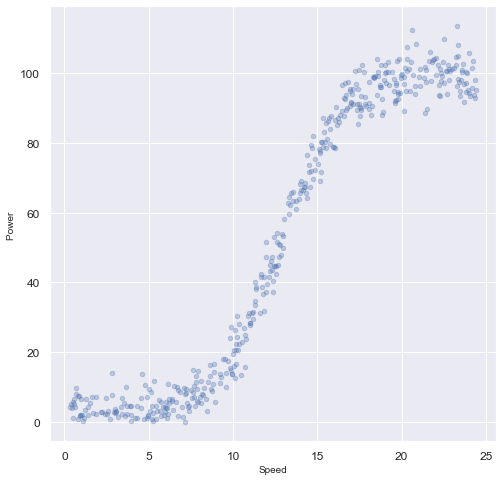

In [28]:
# plot the cleaned data 
df3.plot(x ='speed', y = 'power', kind ="scatter", figsize = [8,8], color ="b", alpha = 0.3, fontsize = 12)

plt.xlabel("Speed", fontsize = 10) 
plt.ylabel("Power ", fontsize = 10)
plt.show()

### Linear Regression 

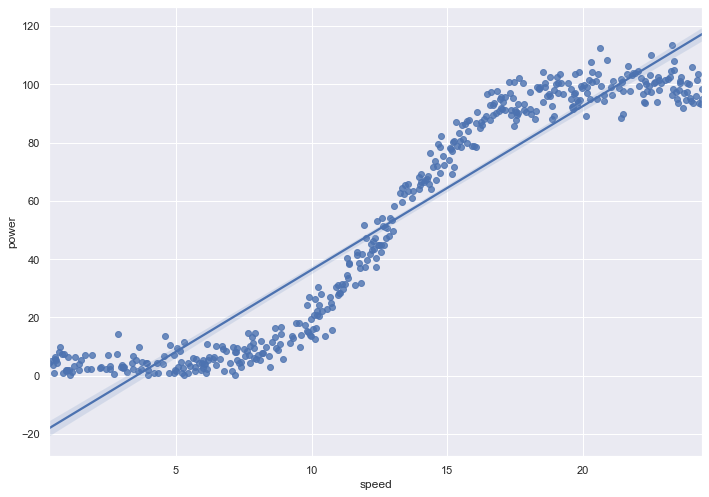

In [29]:
sns.regplot(x='speed',y='power',data = df3) # Linear regression of the cleaned data
plt.show()

## Part 3: Training on the data

#### Neural Networks in Keras

Keras is an open-source software library that provides a Python interface for artificial neural networks.[[1]](https://en.wikipedia.org/wiki/Keras) 
It is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.[[2]](https://keras.io/about/)

In [30]:
# Changing pandas dataframe to numpy array
# Taken from: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5, 02/01/2021
X = df3.iloc[:,0].values # speed
y = df3.iloc[:,1].values # power

In [119]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras as kr
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Taken from: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/, 03/01/2021
# Create a Sequential model
model = kr.models.Sequential()
#model.add(kr.layers.Dense(50, input_dim=2, activation='relu')) not working
#model.add(kr.layers.Dense(40, activation='relu')) # The second hidden layer has 40 nodes and uses the relu activation function.
#model.add(kr.layers.Dense(1, activation='sigmoid')) # The output layer has 1 node and uses the sigmoid activation function.


model.add(kr.layers.Dense(20, input_shape=(1,), activation='sigmoid')) # The first hidden layer has 20 nodes and uses the relu activation function
model.add(kr.layers.Dense(40, activation="relu")) # The second hidden layer has 40 nodes and uses the relu activation function.                                                        
model.add(kr.layers.Dense(1, activation='linear')) # The output layer has 1 node and uses the linear activation function.

In [120]:
# compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) - not working

model.compile(loss="mean_squared_error", optimizer="adam")

In [121]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_50 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 41        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


The first thing to get right is to ensure the input layer has the right number of input features. 
Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

I used the rectified linear unit activation function referred to the Sigmoid function and the ReLU activation function. 
The shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

Compiling the model uses the efficient numerical libraries under the covers such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on my hardware, such as CPU or GPU or even distributed.I had to specify the loss function to evaluate a set of weights, the optimizer to search through different weights for the network and any optional metrics to collect and report during training.

I used mean_squared_error as the loss argument. Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0.[[3]](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
The optimizer is defined as the efficient stochastic gradient descent algorithm “adam“. It automatically tunes itself and gives good results in a wide range of problems.[[4]](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [122]:
# spliting the data into training and test set (80:20)
# Taken from: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/, 03/01/2021
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [123]:
print(X_train.shape) # shape of train and test objects
print(X_test.shape)
# X_train.size

(360,)
(91,)


In [124]:
print(y_train.shape) # shape of new y objects
print(y_train.shape)

(360,)
(360,)


I trained my model on the data by calling the fit() function on the model.
Training occurs over epochs and each epoch is split into batches.
- Epoch: One pass through all of the rows in the training dataset.
- Batch: One or more samples considered by the model within an epoch before weights are updated.

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

In [145]:
model.fit(X_train, y_train, epochs=500, batch_size=10)
accuracy = model.evaluate(X, y) # evaluate the keras model
loss = model.evaluate(X_train, y_train)
print('loss: %.2f' % (loss))
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/500
36/36 [==============================] - 0s 1ms/step - loss: 17.6154
Epoch 2/500
36/36 [==============================] - 0s 1ms/step - loss: 17.8258
Epoch 3/500
36/36 [==============================] - 0s 1ms/step - loss: 17.8639
Epoch 4/500
36/36 [==============================] - 0s 1ms/step - loss: 17.1818
Epoch 5/500
36/36 [==============================] - 0s 2ms/step - loss: 17.2543
Epoch 6/500
36/36 [==============================] - 0s 2ms/step - loss: 17.3138
Epoch 7/500
36/36 [==============================] - 0s 1ms/step - loss: 17.2824
Epoch 8/500
36/36 [==============================] - 0s 1ms/step - loss: 18.4361
Epoch 9/500
36/36 [==============================] - 0s 1ms/step - loss: 17.3358
Epoch 10/500
36/36 [==============================] - 0s 1ms/step - loss: 17.3204
Epoch 11/500
36/36 [==============================] - 0s 1ms/step - loss: 17.2325
Epoch 12/500
36/36 [==============================] - 0s 1ms/step - loss: 17.3201
Epoch 13/500
36/36 [=====

36/36 [==============================] - 0s 1ms/step - loss: 17.3078
Epoch 101/500
36/36 [==============================] - 0s 1ms/step - loss: 17.2352
Epoch 102/500
36/36 [==============================] - 0s 889us/step - loss: 17.3478
Epoch 103/500
36/36 [==============================] - 0s 917us/step - loss: 17.2407
Epoch 104/500
36/36 [==============================] - 0s 861us/step - loss: 17.5100
Epoch 105/500
36/36 [==============================] - 0s 917us/step - loss: 18.6432
Epoch 106/500
36/36 [==============================] - 0s 889us/step - loss: 17.8349
Epoch 107/500
36/36 [==============================] - 0s 917us/step - loss: 17.2769
Epoch 108/500
36/36 [==============================] - 0s 861us/step - loss: 17.3833
Epoch 109/500
36/36 [==============================] - 0s 889us/step - loss: 17.5070
Epoch 110/500
36/36 [==============================] - 0s 1ms/step - loss: 17.1724
Epoch 111/500
36/36 [==============================] - 0s 861us/step - loss: 17.2833


Epoch 197/500
36/36 [==============================] - 0s 861us/step - loss: 17.4649
Epoch 198/500
36/36 [==============================] - 0s 944us/step - loss: 17.4088
Epoch 199/500
36/36 [==============================] - 0s 917us/step - loss: 17.4891
Epoch 200/500
36/36 [==============================] - 0s 889us/step - loss: 17.3450
Epoch 201/500
36/36 [==============================] - 0s 889us/step - loss: 17.3504
Epoch 202/500
36/36 [==============================] - 0s 861us/step - loss: 17.7343
Epoch 203/500
36/36 [==============================] - 0s 861us/step - loss: 17.3155
Epoch 204/500
36/36 [==============================] - 0s 917us/step - loss: 17.0863
Epoch 205/500
36/36 [==============================] - 0s 833us/step - loss: 18.1608
Epoch 206/500
36/36 [==============================] - 0s 861us/step - loss: 17.1922
Epoch 207/500
36/36 [==============================] - 0s 917us/step - loss: 17.1895
Epoch 208/500
36/36 [==============================] - 0s 889us/s

36/36 [==============================] - 0s 1ms/step - loss: 17.3814
Epoch 294/500
36/36 [==============================] - 0s 1ms/step - loss: 16.7905
Epoch 295/500
36/36 [==============================] - 0s 1ms/step - loss: 17.1681
Epoch 296/500
36/36 [==============================] - 0s 1ms/step - loss: 17.1291
Epoch 297/500
36/36 [==============================] - 0s 2ms/step - loss: 17.1987
Epoch 298/500
36/36 [==============================] - 0s 2ms/step - loss: 17.7506
Epoch 299/500
36/36 [==============================] - 0s 2ms/step - loss: 18.4286
Epoch 300/500
36/36 [==============================] - 0s 1ms/step - loss: 17.0547
Epoch 301/500
36/36 [==============================] - 0s 806us/step - loss: 17.2935
Epoch 302/500
36/36 [==============================] - 0s 889us/step - loss: 17.2008
Epoch 303/500
36/36 [==============================] - 0s 917us/step - loss: 17.3874
Epoch 304/500
36/36 [==============================] - 0s 861us/step - loss: 18.2291
Epoch 305/

36/36 [==============================] - 0s 945us/step - loss: 17.2209
Epoch 390/500
36/36 [==============================] - 0s 944us/step - loss: 17.7095
Epoch 391/500
36/36 [==============================] - 0s 917us/step - loss: 17.7259
Epoch 392/500
36/36 [==============================] - 0s 889us/step - loss: 17.0201
Epoch 393/500
36/36 [==============================] - 0s 917us/step - loss: 17.4676
Epoch 394/500
36/36 [==============================] - 0s 889us/step - loss: 17.1313
Epoch 395/500
36/36 [==============================] - 0s 889us/step - loss: 17.2653
Epoch 396/500
36/36 [==============================] - 0s 889us/step - loss: 17.0850
Epoch 397/500
36/36 [==============================] - 0s 972us/step - loss: 17.0935
Epoch 398/500
36/36 [==============================] - 0s 889us/step - loss: 17.6038
Epoch 399/500
36/36 [==============================] - 0s 889us/step - loss: 16.9895
Epoch 400/500
36/36 [==============================] - 0s 889us/step - loss: 17

36/36 [==============================] - 0s 944us/step - loss: 17.1141
Epoch 486/500
36/36 [==============================] - 0s 1ms/step - loss: 17.0098
Epoch 487/500
36/36 [==============================] - 0s 889us/step - loss: 17.0575
Epoch 488/500
36/36 [==============================] - 0s 944us/step - loss: 17.4743
Epoch 489/500
36/36 [==============================] - 0s 861us/step - loss: 17.0338
Epoch 490/500
36/36 [==============================] - 0s 861us/step - loss: 17.1082
Epoch 491/500
36/36 [==============================] - 0s 861us/step - loss: 17.0725
Epoch 492/500
36/36 [==============================] - 0s 889us/step - loss: 17.7497
Epoch 493/500
36/36 [==============================] - 0s 917us/step - loss: 17.3991
Epoch 494/500
36/36 [==============================] - 0s 917us/step - loss: 17.2005
Epoch 495/500
36/36 [==============================] - 0s 889us/step - loss: 17.8140
Epoch 496/500
36/36 [==============================] - 0s 889us/step - loss: 17.4

Neural networks are a stochastic algorithm, meaning that the same algorithm on the same data can train a different model with different skill each time the code is run. This is a feature, not a bug.

The variance in the performance of the model means that to get a reasonable approximation of how well your model is performing, you may need to fit it many times and calculate the average of the accuracy scores.[[5]](https://machinelearningmastery.com/evaluate-skill-deep-learning-models/)



## Make predictions

0.325 => 1 (expected 4)
0.4 => 1 (expected 5)
0.45 => 1 (expected 3)
0.501 => 1 (expected 1)
0.526 => 1 (expected 5)


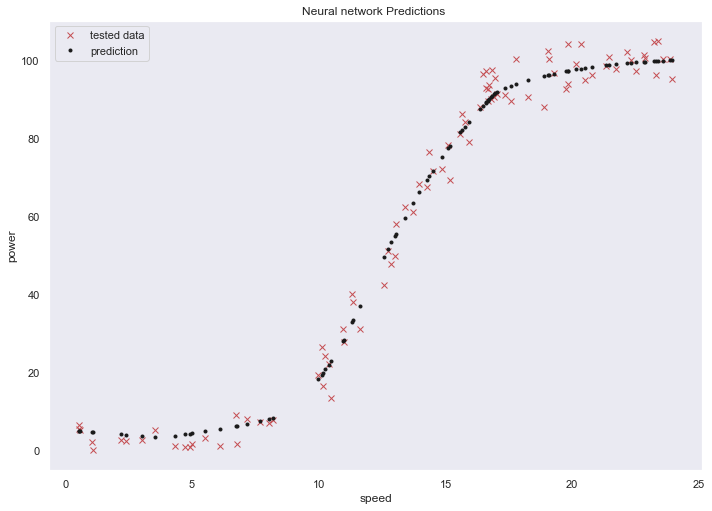

In [139]:
# make class predictions with the model
predictions = model.predict_classes(X)
# predicted class and expected class for the first 5 examples in the dataset.
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))
    
# Graph
plt.plot(X_test, y_test, 'rx', label="tested data")
plt.plot(X_test, model.predict(X_test), 'k.', label="prediction")
plt.xlabel('speed')
plt.ylabel('power')
plt.title("Neural network Predictions ")
plt.grid()
plt.legend()
plt.show()

### END